# Left Join

In order to get some datasets I needed to export them by convertind the dataframe to a csv and then outputting the contents of the file to the terminal such as the example below.
```Python
# output the contents of the dataframe to CSV wile also removing the index for pushing it to a dataframe.
wards_altered.to_csv("wards_altered.csv", index=False)

# open the file and read the contents of the file to the terminal.
with open("wards_altered.csv", "r") as f:
    print(f.read())
```

In a *left join* retrieves all records from the left table (A), and the matching records from the right table (B).
![left join venn diagram](../images/left-join.png)

In [1]:
# Import packages.
import pandas as pd
import matplotlib.pyplot as plt

### Counting missing rows with left join

In [2]:
# Import datasets
movies = pd.read_pickle("../datasets/movies.pkl")
financials = pd.read_pickle("../datasets/financials.pkl")
# Print the first fiew roews of each dataset.
print("movies")
print(movies.head())
print("financials")
print(financials.head())

movies
      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17
financials
       id     budget       revenue
0   19995  237000000  2.787965e+09
1     285  300000000  9.610000e+08
2  206647  245000000  8.806746e+08
3   49026  250000000  1.084939e+09
4   49529  260000000  2.841391e+08


In [3]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


### Enriching a dataset

In [4]:
# subset movies to only select toy story movies and import taglines.
toy_story = movies[movies["title"].str.contains("toy story", case=False)]
taglines = pd.read_pickle("../datasets/taglines.pkl")
# print the first fiew lines of these datasets.
print("toy story")
print(toy_story.head())
print("tag lines")
print(taglines.head())

toy story
         id        title  popularity release_date
103   10193  Toy Story 3   59.995418   2010-06-16
2637    863  Toy Story 2   73.575118   1999-10-30
3716    862    Toy Story   73.640445   1995-10-30
tag lines
       id                                         tagline
0   19995                     Enter the World of Pandora.
1     285  At the end of the world, the adventure begins.
2  206647                           A Plan No One Escapes
3   49026                                 The Legend Ends
4   49529            Lost in our world, found in another.


An *inner join* retrieves records from the left table (A), and the records from the right table (B) that match eachother this is otherwise known as an ntersection.
![inner join venn diagram](../images/inner-join.png)

In [5]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, how="left", on="id")

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
2    862    Toy Story   73.640445   1995-10-30                       NaN
(3, 5)


In [6]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, how="inner")

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
(2, 5)


# Other Joins

### Right join to find unique movies

In a *right join* retrieves mathing records from the left table (A), and all records from the right table (B).
![right join venn diagram](../images/right-join.png)

In [7]:
# import additional datasets
genres = pd.read_pickle("../datasets/movie_to_genres.pkl")
# subset the genres table for action and science fiction
action_movies = genres[genres["genre"].str.contains("action", case=False)]
scifi_movies = genres[genres["genre"].str.contains("science fiction", case=False)]
# print the subsets.
print("action movies")
print(action_movies.head())
print("scifi movies")
print(scifi_movies.head())

action movies
    movie_id   genre
3         11  Action
14        18  Action
25        22  Action
26        24  Action
42        58  Action
scifi movies
    movie_id            genre
2         11  Science Fiction
17        18  Science Fiction
20        19  Science Fiction
38        38  Science Fiction
49        62  Science Fiction


In [8]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on="id", right_on="movie_id", how="inner")

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


### Popular genres with right join

In [9]:
# import data.
movie_to_genres = pd.read_pickle("../datasets/movie_to_genres.pkl")
# subset movies by top 10 most popular.
pop_movies = movies.sort_values('popularity', ascending=False).head(10)

# display the top few records of the new table.
print("movie to genres")
print(movie_to_genres.head())
print("pop movies")
print(pop_movies.head())

movie to genres
   movie_id            genre
0         5            Crime
1         5           Comedy
2        11  Science Fiction
3        11           Action
4        11        Adventure
pop movies
          id                    title  popularity release_date
4546  211672                  Minions  875.581305   2015-06-17
4343  157336             Interstellar  724.247784   2014-11-05
1966  293660                 Deadpool  514.569956   2016-02-09
2423  118340  Guardians of the Galaxy  481.098624   2014-07-30
4220   76341       Mad Max: Fury Road  434.278564   2015-05-13


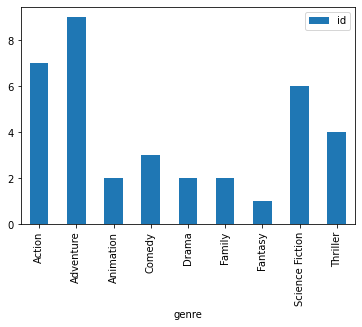

In [10]:
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on="movie_id", 
                                      right_on="id")

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

### Using outer join to select actors

In a *outer join* retrieves mathing records from the left table (A), and records from the right table (B) that do NOT match eachother.

![outer join venn diagram](../images/no-join.png)

In [22]:
# import data
iron_1_actors = pd.read_csv("../datasets/iron_1_actors.csv").astype(object)
iron_2_actors = pd.read_csv("../datasets/iron_2_actors.csv").astype(object)

In [23]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     on="id",
                                     how="outer",
                                     suffixes=("_1", "_2"))

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

                   character_1        id           name_1 character_2 name_2
0                       Yinsen   17857.0       Shaun Toub         NaN    NaN
2  Obadiah Stane / Iron Monger    1229.0     Jeff Bridges         NaN    NaN
3                  War Machine   18288.0  Terrence Howard         NaN    NaN
5                         Raza   57452.0      Faran Tahir         NaN    NaN
8                   Abu Bakaar  173810.0    Sayed Badreya         NaN    NaN


# Self Join

In [27]:
# Import Data
crews = pd.read_pickle("../datasets/crews.pkl")
# print the top fiew rows of the table.
print(crews.head())

      id  department             job               name
0  19995     Editing          Editor  Stephen E. Rivkin
2  19995       Sound  Sound Designer  Christopher Boyes
4  19995  Production         Casting          Mali Finn
6  19995   Directing        Director      James Cameron
7  19995     Writing          Writer      James Cameron


In [28]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
                  (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())

        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays  


# Merging on Indexes

### Index merge for movie ratings.

In [31]:
# Import datasets.
moves = pd.read_pickle("../datasets/movies.pkl")
ratings = pd.read_pickle("../datasets/ratings.pkl")

In [32]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on="id", how="left")

# Print the first few rows of movies_ratings
print(movies_ratings.head())

      id                 title  popularity release_date  vote_average  \
0    257          Oliver Twist   20.415572   2005-09-23           6.7   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5   
2  38365             Grown Ups   38.864027   2010-06-24           6.0   
3   9672              Infamous    3.680896   2006-11-16           6.4   
4  12819       Alpha and Omega   12.300789   2010-09-17           5.3   

   vote_count  
0       274.0  
1        27.0  
2      1705.0  
3        60.0  
4       124.0  


### Do sequels earn more?

In [37]:
# import datasets
sequels = pd.read_pickle("../datasets/sequels.pkl").astype(object)
financials = pd.read_pickle("../datasets/financials.pkl").astype(object)

In [38]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True,
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values("diff", ascending=False).head())

                                 title_org                 title_seq  \
2929                        Before Sunrise  The Amazing Spider-Man 2   
1256   Star Trek III: The Search for Spock                The Matrix   
293   Indiana Jones and the Temple of Doom              Man of Steel   
1084                                   Saw          Superman Returns   
1334                        The Terminator          Star Trek Beyond   

             diff  
2929  700182027.0  
1256  376517383.0  
293   329845518.0  
1084  287169523.0  
1334  265100616.0  
